Assumptions in Multilinear Regression
1. Linearity: The relationship between the predictors and the response is linear.
2. Independence: Observations are independent of each other.
3. Homoscedasticity: The residuals (Y - Y hat)) exhibit constant variance at all levels of the predictor.
4. Normal Distribution of Errors: The residuals of the model are normally distributed.
5. No multicollinearity: The independent variables should not be too highly correlated with each other.

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot
import numpy as np

In [6]:
cars = pd.read_csv("Cars.csv")
cars.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


In [7]:
# Rearrange the columns
cars = pd.DataFrame(cars, columns=["HP","VOL","SP", "WT","MPG"])
cars.head()

,HP,VOL,SP,WT,MPG
0,49,89,104.185353,28.762059,53.700681
1,55,92,105.461264,30.466833,50.013401
2,55,92,105.461264,30.193597,50.013401
3,70,92,113.461264,30.632114,45.696322
4,53,92,104.461264,29.889149,50.504232


##Description of columns
-MPG:Milege of the car (Mile per Gallon)(This is Y-column to be predicted)
-HP:Ḥorse Power of the car
-VOL:Volume of the car(size)
-SP:Top speed of the car(Miles in Hour)
-WT:Weight of the car(Pounds)

In [8]:
cars = pd.DataFrame(cars, columns=["HP","VOL","SP", "WT","MPG"])
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   HP      81 non-null     int64  
 1   VOL     81 non-null     int64  
 2   SP      81 non-null     float64
 3   WT      81 non-null     float64
 4   MPG     81 non-null     float64
dtypes: float64(3), int64(2)
memory usage: 3.3 KB


In [9]:
cars.isna().sum()

HP     0
VOL    0
SP     0
WT     0
MPG    0
dtype: int64

##Observations
-There are no missing values
-There arec81 observations (81 different cars data)
-The ata types of the colums are also relevant and valid

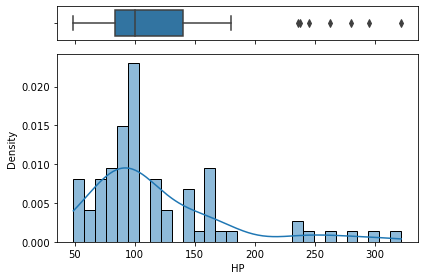

In [10]:
fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(data=cars, x='HP', ax=ax_box, orient='h')
ax_box.set(xlabel='')
sns.histplot(data=cars, x='HP', ax=ax_hist, bins=30, kde=True, stat="density")
ax_hist.set(ylabel='Density')
plt.tight_layout()
plt.show()

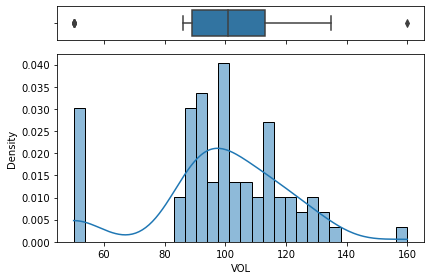

In [11]:
fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(data=cars, x='VOL', ax=ax_box, orient='h')
ax_box.set(xlabel='')
sns.histplot(data=cars, x='VOL', ax=ax_hist, bins=30, kde=True, stat="density")
ax_hist.set(ylabel='Density')
plt.tight_layout()
plt.show()

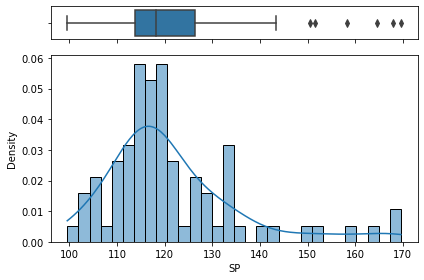

In [12]:
fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(data=cars, x='SP', ax=ax_box, orient='h')
ax_box.set(xlabel='')
sns.histplot(data=cars, x='SP', ax=ax_hist, bins=30, kde=True, stat="density")
ax_hist.set(ylabel='Density')
plt.tight_layout()
plt.show()

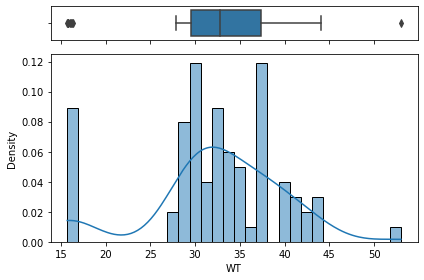

In [13]:
fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(data=cars, x='WT', ax=ax_box, orient='h')
ax_box.set(xlabel='')
sns.histplot(data=cars, x='WT', ax=ax_hist, bins=30, kde=True, stat="density")
ax_hist.set(ylabel='Density')
plt.tight_layout()
plt.show()

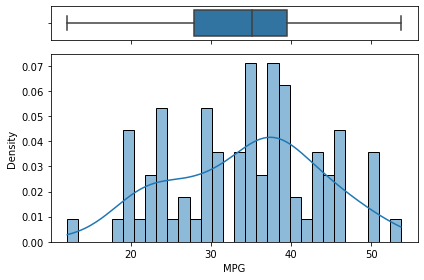

In [14]:
fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(data=cars, x='MPG', ax=ax_box, orient='h')
ax_box.set(xlabel='')
sns.histplot(data=cars, x='MPG', ax=ax_hist, bins=30, kde=True, stat="density")
ax_hist.set(ylabel='Density')
plt.tight_layout()
plt.show()

## Observations
-There are some extreme values observed in towards the right tail of SP and HP distributions
-In VOL and WT columns, a few outliers are observed in both tails of their distributions
-The extreme values of cars data may have come from the specially designed nature of cars
-As this is multi-dimensional data,the outliers with respect to spatial dimensions may have to be considered while building the regression model

In [15]:
cars[cars.duplicated()]

,HP,VOL,SP,WT,MPG


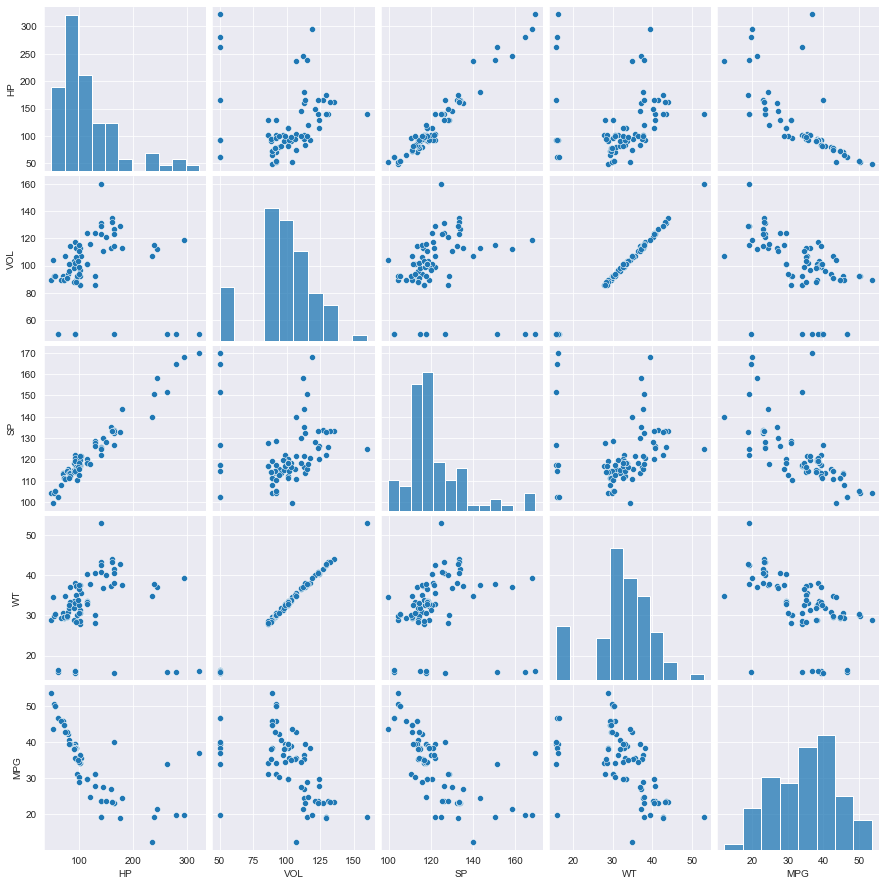

In [16]:
sns.set_style(style='darkgrid')
sns.pairplot(cars)

In [17]:
cars.corr()

,HP,VOL,SP,WT,MPG
HP,1.000000,0.077459,0.973848,0.076513,-0.725038
VOL,0.077459,1.000000,0.102170,0.999203,-0.529057
SP,0.973848,0.102170,1.000000,0.102439,-0.687125
WT,0.076513,0.999203,0.102439,1.000000,-0.526759
MPG,-0.725038,-0.529057,-0.687125,-0.526759,1.000000


##Observations
-Between x and y, all the x variables are shoeing moderate to high correlation strengths, highest being between HP and MPG
-Therefore this dataset qualifies for buliding a multiple linear regression model to predict MPG
-Among x columns (x1,x2,x3, and x4),some very high correlation strengths are observed between SP vs HP,VOL vs WT
-The high correlation among x columns is not desirable as it might lead to multicollinearity problem 

In [25]:
model1 = smf.ols('MPG~WT+VOL+SP+HP',data=cars).fit()

In [26]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     63.80
Date:                Thu, 06 Feb 2025   Prob (F-statistic):           1.54e-23
Time:                        11:19:34   Log-Likelihood:                -233.96
No. Observations:                  81   AIC:                             477.9
Df Residuals:                      76   BIC:                             489.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.6773     14.900      2.059      0.043       1.001      60.354
WT             0.4006      1.693      0.237      0.814      -2.972       3.773
VOL           -0.3361      0.569     -0.591      0.556      -1.469       0.796
SP             0.3956      0.158      2.500      0.015       0.080       0.711
HP            -0.2054      0.039     -5.239      0.000      -0.284      -0.127
==============================================================================
Omnibus:                       10.780   Durbin-Watson:                   1.403
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               11.722
Skew:                           0.707   Prob(JB):                      0.00285
Kurtosis:                       4.215   Cond. No.                     6.09e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##Observations
-The R-squared and adjusted R-squared value are good and about 75% of variability in Y is explained by X columns
-The probability value with respecr of F-statistic is close to zero, indicating that all or some of X columns are significant
-The p-value for VOL and WT are higher than 5% indicating some interaction issue among themselves,which need to be further explored

In [22]:
df1 = pd.DataFrame()
df1["actual_y1"] = cars["MPG"]
df1.head()

,actual_y1
0,53.700681
1,50.013401
2,50.013401
3,45.696322
4,50.504232


In [27]:
pred_y1 = model1.predict(cars.iloc[:,0:4])
df1["pred_y1"] = pred_y1
df1.head()

,actual_y1,pred_y1
0,53.700681,43.441935
1,50.013401,42.388793
2,50.013401,42.279341
3,45.696322,42.538360
4,50.504232,42.172648


In [29]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE :", mean_squared_error(df1["actual_y1"], df1["pred_y1"]))

MSE : 18.8971411523431
